In [1]:
import magic
import scprep
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

import scanpy as sc
sc.settings.set_figure_params(dpi=100, facecolor='white')

ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D3FD3"]



In [3]:
adata = sc.read_h5ad("fs_integrated_clean.h5ad")


In [4]:
highlevel_labels = {
    "0": "Pluripotent_1",
    "9": "Pluripotent_2",
    "10": "Pluripotent_3",
    "3": "Mesendoderm",
    "8": "Nascent_Mesoderm",
    "1": "Emergent_Mesoderm_1",
    "11": "Advanced_Mesoderm",
    "5": "Emergent_Mesoderm_2",
    "4": "Endoderm",
    "2": "PGCLCs",
    "7": "Amnion_1",
    "6": "Amnion_2"
    
}
adata.obs["Cell_Types_Fine"] = adata.obs["louvain"].map(highlevel_labels)

In [5]:
highlevel_labels = {
    "Pluripotent_1": "Pluripotent",
    "Pluripotent_2": "Pluripotent",
    "Pluripotent_3": "Pluripotent",
    "Mesendoderm": "Mesendoderm",
    "Nascent_Mesoderm": "Mesoderm",
    "Emergent_Mesoderm_1": "Mesoderm",
    "Advanced_Mesoderm": "Mesoderm",
    "Emergent_Mesoderm_2": "Mesoderm",
    "Endoderm": "Endoderm",
    "PGCLCs": "PGCLCs",
    "Amnion_1": "Amnion",
    "Amnion_2": "Amnion"
    
}
adata.obs["Cell_Types_Coarse"] = adata.obs["Cell_Types_Fine"].map(highlevel_labels)

In [6]:
adata = adata[adata.obs['Cell_Types_Coarse'].isin([
    'Pluripotent','Mesendoderm','Mesoderm','Endoderm'])]

In [7]:
data = pd.DataFrame(adata.X)


In [8]:
data.columns = list(adata.var.index)

In [9]:
data

,AL645608.3,AL645608.1,HES4,ACAP3,MXRA8,VWA1,ATAD3C,TMEM240,MMP23B,SKI,...,MT-ND2,MT-CO1,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
0,-0.141587,-0.203976,-0.314156,-0.377515,-0.383292,-0.643109,-0.133606,-0.161739,-0.314238,-0.898212,...,0.099435,0.434180,0.341016,0.421148,0.512464,0.585473,0.311301,0.860180,-1.245403,0.450094
1,-0.141587,-0.203976,-0.314156,-0.377515,0.443038,0.762681,-0.133606,-0.161739,-0.314238,-0.330195,...,0.507806,0.171029,0.307473,0.211993,0.208621,0.437592,0.340724,0.574804,0.690829,0.089311
2,-0.141587,-0.203976,-0.314156,-0.377515,1.337591,1.322556,-0.133606,-0.161739,-0.314238,1.418098,...,0.400292,0.280758,0.361490,0.388957,0.380787,1.184384,0.326955,0.925640,0.638895,0.239193
3,-0.141587,-0.203976,-0.314156,-0.377515,-0.383292,-0.643109,-0.133606,-0.161739,-0.314238,0.288971,...,0.347718,0.207335,0.412870,0.246144,0.318157,-1.396712,0.290571,0.518409,0.990071,0.293293
4,-0.141587,-0.203976,-0.314156,1.071844,1.590479,0.791998,-0.133606,-0.161739,-0.314238,-0.082445,...,0.253415,0.226380,0.317671,0.200779,0.164959,0.699848,0.242344,0.270733,1.494094,0.160498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18635,-0.141587,-0.203976,-0.314156,-0.377515,-0.383292,-0.643109,-0.133606,10.000000,-0.314238,-0.898212,...,1.234816,1.190735,1.097693,1.182160,1.106387,-1.396712,1.066313,1.339815,0.750443,1.200153
18636,-0.141587,-0.203976,-0.314156,-0.377515,-0.383292,-0.643109,-0.133606,-0.161739,-0.314238,0.750033,...,0.458121,0.318196,0.173898,0.254362,0.168984,0.859495,0.108506,0.309513,0.471672,0.331149
18637,-0.141587,-0.203976,-0.314156,-0.377515,-0.383292,-0.643109,-0.133606,-0.161739,-0.314238,0.421791,...,-0.249251,0.241111,0.051966,0.267967,0.085035,0.550296,0.208678,0.100003,-0.308843,0.178246
18638,-0.141587,-0.203976,-0.314156,2.770045,-0.383292,-0.643109,-0.133606,-0.161739,-0.314238,0.873382,...,0.427607,0.036346,0.056181,0.090348,0.159719,-0.528772,0.074648,0.075226,0.331136,-0.173331


In [10]:
magic_op = magic.MAGIC()


In [11]:
emt_magic = magic_op.fit_transform(data, genes=list(adata.var.index))


Calculating MAGIC...
  Running MAGIC on 18640 cells and 2919 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.54 seconds.
    Calculating KNN search...
    Calculated KNN search in 30.90 seconds.
    Calculating affinities...
    Calculated affinities in 30.79 seconds.
  Calculated graph and diffusion operator in 64.29 seconds.
  Calculating imputation...
  Calculated imputation in 4.57 seconds.
Calculated MAGIC in 69.76 seconds.


In [16]:
adata.obs.index

Index(['AAACCCAAGGATATGT-1-0', 'AAACCCAAGGCCTGAA-1-0', 'AAACCCACAACACGAG-1-0',
       'AAACCCACAGTGTACT-1-0', 'AAACCCATCCACGTAA-1-0', 'AAACCCATCGCAATTG-1-0',
       'AAACGAACACATGGTT-1-0', 'AAACGAACAGCTGTCG-1-0', 'AAACGAACATGCGTGC-1-0',
       'AAACGAAGTCCTGTTC-1-0',
       ...
       'TTTGACTTCTCTATGT-1-5', 'TTTGATCCAGTGGTGA-1-5', 'TTTGATCGTCTCAAGT-1-5',
       'TTTGGAGCACCTCGTT-1-5', 'TTTGGAGCAGTGCCTG-1-5', 'TTTGGAGGTTCGTTCC-1-5',
       'TTTGGTTCACAAATCC-1-5', 'TTTGTTGGTGCCCGTA-1-5', 'TTTGTTGGTGGTAACG-1-5',
       'TTTGTTGTCCAGTACA-1-5'],
      dtype='object', length=18640)

In [17]:
emt_magic['Cell_Types_Coarse'] = list(adata.obs['Cell_Types_Coarse'])
emt_magic['Cell_Types_Fine'] = list(adata.obs['Cell_Types_Fine'])
emt_magic['barcodes'] = list(adata.obs.index)
emt_magic['batch'] = list(adata.obs['batch'])

In [18]:
 palette={
        "Pluripotent": ingeo_colours[6],
               "Mesendoderm": ingeo_colours[7],
               "Endoderm": ingeo_colours[0],
               "PGCLCs": ingeo_colours[3],
               "Amnion": ingeo_colours[2],
               "Mesoderm": ingeo_colours[4]
    }

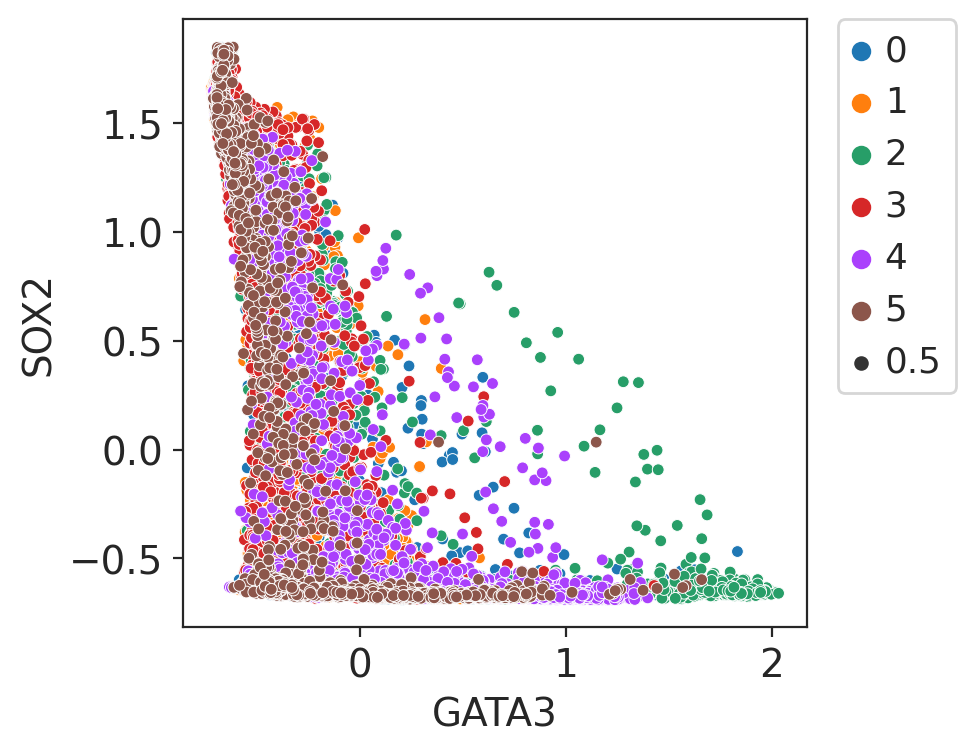

In [19]:
sns.set_style("ticks")


sns.scatterplot(data=emt_magic, x="GATA3", y="SOX2", hue='batch', size=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [20]:
lineage_pseudotimes = pd.read_csv("Seurat_Slingshot_TradeSeq/all_samples/lineage_pseudotimes.csv")


In [21]:
lineage_pseudotimes.columns

Index(['Unnamed: 0', 'Endo_pt', 'Meso_pt', 'PGCLC_pt', 'Amnion_pt',
       'Pluri_pt'],
      dtype='object')

In [22]:
lineage_pseudotimes = lineage_pseudotimes.rename(columns={'Unnamed: 0': 'barcodes'})

In [23]:
emt_magic.iloc[:,0:2919] = (emt_magic.iloc[:,0:2919]-emt_magic.iloc[:,0:2919].min())/(emt_magic.iloc[:,0:2919].max()-emt_magic.iloc[:,0:2919].min())


In [24]:
result = pd.merge(emt_magic, lineage_pseudotimes, on="barcodes")

In [25]:
result.loc[result['Endo_pt']>0, 'Endo_lineage'] = 'Endo_lineage'
result.loc[result['Meso_pt']>0, 'Meso_lineage'] = 'Meso_lineage'

In [26]:
endo_ = result.loc[result['Endo_lineage']=='Endo_lineage']
endo_['Lineage'] = 'Endoderm'
endo_['Pseudotime'] = endo_['Endo_pt']

meso_ = result.loc[result['Meso_lineage']=='Meso_lineage']
meso_['Lineage'] = 'Mesoderm'
meso_['Pseudotime'] = meso_['Meso_pt']


lineage_data = pd.concat([endo_, meso_])

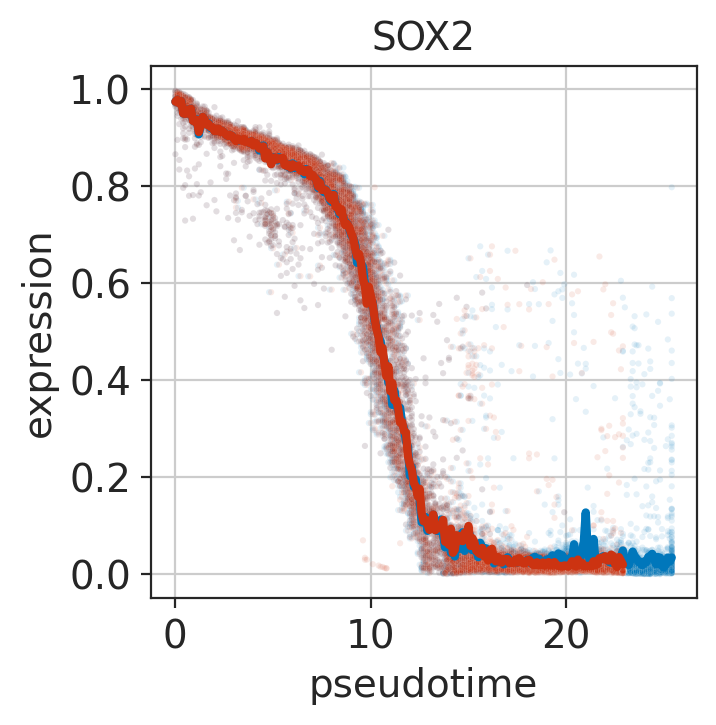

In [27]:
lineage_data = lineage_data.round({'Pseudotime':1})


sns.set_style("ticks")
plt.figure(figsize=(3.5,3.5))

goi = "SOX2"

sns.scatterplot(data=lineage_data, x="Pseudotime", y=goi, hue='Lineage' ,palette=palette, s=5, alpha=0.1)

sns.lineplot(data=lineage_data, x="Pseudotime", y=goi, hue='Lineage' ,palette=palette, ci=None, linewidth=3, estimator='mean')
plt.title(f"{goi}")
plt.ylabel("expression")
plt.xlabel("pseudotime")

plt.legend('',frameon=False)
plt.grid()


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


# Function to smooth data using spline interpolation
def smooth_data(x, y, smoothing_factor=0.8):
    spline = UnivariateSpline(x, y, s=smoothing_factor)
    smoothed_x = np.linspace(x.min(), x.max(), 1000)  # Adjust 1000 based on data density if needed
    smoothed_y = spline(smoothed_x)
    return smoothed_x, smoothed_y


# def lineage_line(Lineage_data, goi,color, LS):
#     data = {
#         'Pseudotime': Lineage_data['Pseudotime'],
#         'Gene_Expression': Lineage_data[goi]
#     }
#     df = pd.DataFrame(data)
    
#     # Calculate mean and standard deviation of gene expression per pseudotime
#     grouped_df = df.groupby('Pseudotime')['Gene_Expression'].agg(['mean', 'sem']).reset_index()
    
#     # Smooth the mean gene expression data
#     smoothed_x, smoothed_mean = smooth_data(grouped_df['Pseudotime'], grouped_df['mean'])
    
#     # Calculate upper and lower bounds for confidence interval based on standard deviation
#     upper_bound = grouped_df['mean'] + 1.96 * grouped_df['sem']
#     lower_bound = grouped_df['mean'] - 1.96 * grouped_df['sem']
    
#     # Smooth the upper and lower bounds
#     smoothed_upper_bound_x, smoothed_upper_bound_y = smooth_data(grouped_df['Pseudotime'], upper_bound)
#     smoothed_lower_bound_x, smoothed_lower_bound_y = smooth_data(grouped_df['Pseudotime'], lower_bound)

#     #smoothed_mean = (smoothed_mean - smoothed_mean.min()) / (smoothed_mean.max() - smoothed_mean.min())
    
#     #smoothed_upper_bound_x = (smoothed_upper_bound_x - smoothed_upper_bound_x.min()) / (smoothed_upper_bound_x.max() - smoothed_upper_bound_x.min())
#     #smoothed_upper_bound_y = (smoothed_upper_bound_y - smoothed_upper_bound_y.min()) / (smoothed_upper_bound_y.max() - smoothed_upper_bound_y.min())

#     #smoothed_lower_bound_x = (smoothed_lower_bound_x - smoothed_lower_bound_x.min()) / (smoothed_lower_bound_x.max() - smoothed_lower_bound_x.min())
#     #smoothed_lower_bound_y = (smoothed_lower_bound_y - smoothed_lower_bound_y.min()) / (smoothed_lower_bound_y.max() - smoothed_lower_bound_y.min())


#     plt.plot(smoothed_x, smoothed_mean, label='Smoothed Mean', color=color, linestyle=LS)
#     plt.fill_between(smoothed_upper_bound_x, smoothed_upper_bound_y, smoothed_lower_bound_y, color=color, alpha=0.3, label='95% Confidence Interval')

#     #plt.xlabel('Pseudotime')
#     #plt.ylabel('Gene Expression')
#     plt.legend()
#     plt.legend('',frameon=False)

def lineage_line(Lineage_data, goi, color, LS):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    data = {
        'Pseudotime': Lineage_data['Pseudotime'],
        'Gene_Expression': Lineage_data[goi]
    }
    df = pd.DataFrame(data)

    # Aggregate mean and sem
    grouped_df = df.groupby('Pseudotime')['Gene_Expression'].agg(['mean', 'sem']).reset_index()

    # Smooth mean and sem (on the same x)
    smoothed_x, smoothed_mean = smooth_data(grouped_df['Pseudotime'], grouped_df['mean'])
    _, smoothed_sem = smooth_data(grouped_df['Pseudotime'], grouped_df['sem'])  # Same x-values assumed

    # Recalculate confidence intervals from smoothed data
    upper_bound = smoothed_mean + 1.96 * smoothed_sem
    lower_bound = smoothed_mean - 1.96 * smoothed_sem

    # Plotting
    plt.plot(smoothed_x, smoothed_mean, label='Smoothed Mean', color=color, linestyle=LS)
    plt.fill_between(smoothed_x, lower_bound, upper_bound, color=color, alpha=0.3, label='95% CI')

    plt.legend(frameon=False)


In [35]:
Endo = lineage_data.loc[lineage_data['Lineage']=='Endoderm']
Meso = lineage_data.loc[lineage_data['Lineage']=='Mesoderm']

In [36]:
genes_ = ['EOMES', 'NKX2-5','MESP1','FOXC1','SOX17','FOXA2','NANOG','TBXT','POU5F1','SOX2']

In [37]:
Endo['Pseudotime'] = (Endo['Pseudotime'] - Endo['Pseudotime'].min()) / (Endo['Pseudotime'].max() - Endo['Pseudotime'].min())
Meso['Pseudotime'] = (Meso['Pseudotime'] - Meso['Pseudotime'].min()) / (Meso['Pseudotime'].max() - Meso['Pseudotime'].min())

In [38]:
#Endo.iloc[:,0:2919] = (Endo.iloc[:,0:2919]-Endo.iloc[:,0:2919].min())/(Endo.iloc[:,0:2919].max()-Endo.iloc[:,0:2919].min())
#Meso.iloc[:,0:2919] = (Meso.iloc[:,0:2919]-Meso.iloc[:,0:2919].min())/(Meso.iloc[:,0:2919].max()-Meso.iloc[:,0:2919].min())

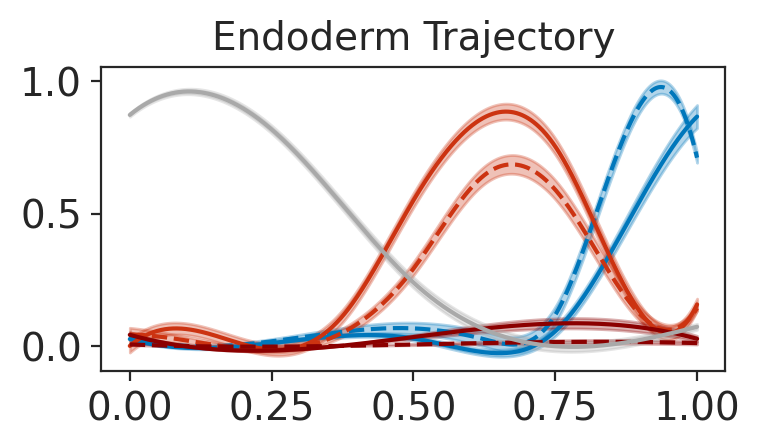

In [42]:
lineage_data = lineage_data.round({'Pseudotime':1})


sns.set_style("ticks")
plt.figure(figsize=(4,2))

goi = 'FOXA2'
lineage_line(Endo, goi, palette['Endoderm'], '-')
goi = 'SOX17'
lineage_line(Endo, goi, palette['Endoderm'], '--')
goi = 'MESP1'
lineage_line(Endo, goi, palette['Mesoderm'], '-')
goi = 'FOXC1'
lineage_line(Endo, goi, palette['Mesoderm'], '--')

goi = 'NKX2-5'
lineage_line(Endo, goi, "#8B0000", '-')
goi = 'HOXB8'
lineage_line(Endo, goi, "#8B0000", '--')

goi = 'SOX2'
lineage_line(Endo, goi, "darkgrey", '-')

#goi = 'TBXT'
#lineage_line(Endo, goi, "purple", '-')




plt.title(f"Endoderm Trajectory")
plt.ylabel("")
plt.xlabel("")

plt.legend('',frameon=False)
#plt.grid()

plt.savefig(f"Endoderm_Dynamics.pdf")


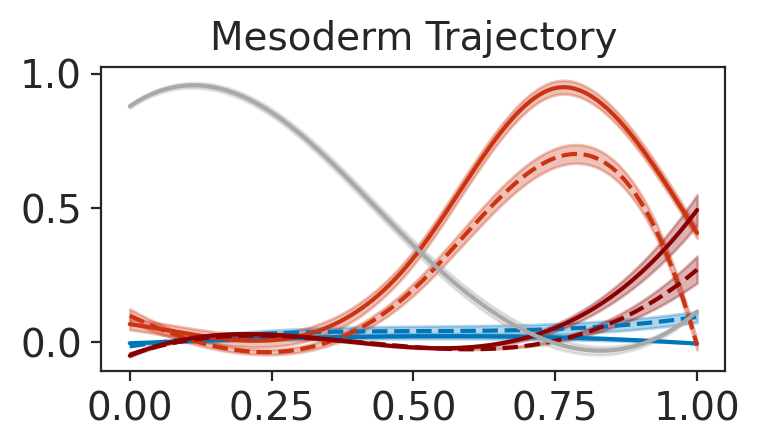

In [43]:
lineage_data = lineage_data.round({'Pseudotime':1})


sns.set_style("ticks")
plt.figure(figsize=(4,2))

goi = 'FOXA2'
lineage_line(Meso, goi, palette['Endoderm'], '-')
goi = 'SOX17'
lineage_line(Meso, goi, palette['Endoderm'], '--')
goi = 'MESP1'
lineage_line(Meso, goi, palette['Mesoderm'], '-')
goi = 'FOXC1'
lineage_line(Meso, goi, palette['Mesoderm'], '--')
#goi = 'HAND1'
#lineage_line(Meso, goi, palette['Mesoderm'], 'dotted')

goi = 'NKX2-5'
lineage_line(Meso, goi, "#8B0000", '-')
goi = 'HOXB8'
lineage_line(Meso, goi, "#8B0000", '--')

goi = 'SOX2'
lineage_line(Meso, goi, "darkgrey", '-')

#goi = 'TBXT'
#lineage_line(Meso, goi, "purple", '-')




plt.title(f"Mesoderm Trajectory")
plt.ylabel("")
plt.xlabel("")

plt.legend('',frameon=False)
#plt.grid()

plt.savefig(f"Mesoderm_Dynamics.pdf")
